# 採用Selenium自動化系統到博客來網頁，並且自動化的選擇到暢銷中文書的部分

In [1]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
%matplotlib inline

driver_path="/Users/beiyulin/Desktop/chromedriver"
book_home = "https://www.books.com.tw/"
driver =webdriver.Chrome(executable_path=driver_path)
driver.get(book_home)
sleep(15)
print(driver.current_url)

https://www.books.com.tw/


In [313]:
elements =driver.find_elements_by_css_selector('#home_menu_list a')
elements[1].click()

In [314]:
elements =driver.find_elements_by_css_selector('.sub_list a')
elements[4].click()
a=driver.current_url


# 透過bs4抓取書名與作者

In [316]:
book_title=[]
book_au =[]
response = requests.get(a)
soup = BeautifulSoup(response.text)
elements = soup.select('.type02_bd-a a')
book_title="h1"
book_title=[elements[e].text  for e in range(0 ,len(elements), 2)] #因為沒有將書名與作者區分，因此以奇數偶數區分
book_au=[elements[e].text  for e in range(1, len(elements),  2)]
#print(book_title)
#print(book_au)
for i,e in zip(book_title,book_au):
    print(i,e)


原子習慣：細微改變帶來巨大成就的實證法則 詹姆斯‧克利爾
極道療癒師：你可以不要活成別人的形狀 宋如珊
2021唐綺陽星座運勢大解析 唐綺陽
人生賽道，勇敢試也要勇敢放棄 劉宥彤
扭曲的正義：檢察官面對的殘酷真相，走向崩潰的檢警與媒體 吳忻穎
風起臺灣Be Sky Taiwan：我想從老鷹的背上俯瞰全世界，發現臺灣。 小林賢伍
投資最重要的事：一本股神巴菲特讀了兩遍的書 霍華．馬克斯
無麩質廚房：排除過敏源，打造無毒健康生活，75道無麩質料理、點心與飲品完美提案 賴家家
致富心態：關於財富、貪婪與幸福的20堂理財課 摩根．豪瑟
芳療天后Gina給你 全家人的芳香精油治療聖經：慢性病控制、癌症復元、神經復健、呼吸防護，建立家的芳香醫藥箱，養出全家好體質 許怡蘭（Gina Hsu）
一個人，你也要活得晴空萬里 角子
小麥完全真相：歐美千萬人甩開糖尿病、心臟病、肥胖、氣喘、皮膚過敏的去小麥飲食法 威廉‧戴維斯
從內做起：頂尖領導大師淬鍊25年的10堂課 約翰‧麥斯威爾
永遠的第1名：WBL1 羽宸寰,林珮瑜,結果娛樂
過度努力：每個「過度」，都是傷的證明 周慕姿
天能勁源 我要更好：解密百年失傳太極內功 突破人腦思維  企業家、金融分析師、中西醫都在練的自癒力 黃正斌
幸好冰箱有蛋：100道每天吃都不膩的幸福蛋料理 嘖嘖料理手帳zeze
無麩質飲食，讓你不生病！：揭開小麥、碳水化合物、糖傷腦又傷身的驚人真相 大衛‧博瑪特,克莉絲汀‧羅伯格
【當和尚遇到鑽石3】瑜伽真的有用嗎？：身心靈覺醒的旅程 麥可‧羅區格西
新制多益 NEW TOEIC 單字大全：2018起多益更新單字資訊完全掌握！(附13小時8種版本MP3) David Cho
我們必須去：駕駛艙視角的飛行故事 王立楨
天上總會有雲，但你才是天空 劉軒
輕鬆當爸媽，孩子更健康：超人氣小兒科醫師黃瑽寧教你安心育兒【暢銷增訂版】 黃瑽寧
永遠的第1名：WBL1寫真書 結果娛樂,WeTV
關鍵時刻下的13堂投資心法與實作課：無懼市場波動的不敗投資策略（隨書附贈「關鍵時刻投資心法手繪筆記」） 林明樟
樓鳳，性淘金產業大揭密：警察帶路，立馬看懂江湖規矩，菜雞一夜成為老司機，乖乖女聽懂所有men’s talk 張榮哲
我讓最想被擁抱的男人給威脅了 7 桜日梯子
新制多益NEW TOEIC聽力／閱讀題庫解析【博客來獨家套書】（附4

# 透過pandas整理以上資料產出表格

In [317]:
import pandas as pd

book_df= pd.DataFrame()
book_df['書名']=book_title
book_df['作者']=book_au
book_df.style.set_properties(**{'text-align': 'left'})
book_df



,書名,作者
0,原子習慣：細微改變帶來巨大成就的實證法則,詹姆斯‧克利爾
1,極道療癒師：你可以不要活成別人的形狀,宋如珊
2,2021唐綺陽星座運勢大解析,唐綺陽
3,人生賽道，勇敢試也要勇敢放棄,劉宥彤
4,扭曲的正義：檢察官面對的殘酷真相，走向崩潰的檢警與媒體,吳忻穎
...,...,...
95,第一人稱單數,村上春樹
96,最強廢渣皇子暗中活躍於帝位之爭 佯裝無能的SS級皇子背地支配王位繼承戰 (2),タンバ
97,母與子心靈小語,褚宗堯
98,怪物講師教學團隊的TOEFL iBT托福「單字」+「文法」【虛擬點讀筆版】（免費附贈「You...,怪物講師教學團隊


In [318]:
foreign=book_df['作者'].str.len()>3
book_df['foreign']=foreign
book_df

,書名,作者,foreign
0,原子習慣：細微改變帶來巨大成就的實證法則,詹姆斯‧克利爾,True
1,極道療癒師：你可以不要活成別人的形狀,宋如珊,False
2,2021唐綺陽星座運勢大解析,唐綺陽,False
3,人生賽道，勇敢試也要勇敢放棄,劉宥彤,False
4,扭曲的正義：檢察官面對的殘酷真相，走向崩潰的檢警與媒體,吳忻穎,False
...,...,...,...
95,第一人稱單數,村上春樹,True
96,最強廢渣皇子暗中活躍於帝位之爭 佯裝無能的SS級皇子背地支配王位繼承戰 (2),タンバ,True
97,母與子心靈小語,褚宗堯,False
98,怪物講師教學團隊的TOEFL iBT托福「單字」+「文法」【虛擬點讀筆版】（免費附贈「You...,怪物講師教學團隊,True


In [319]:
book_df.sample(10)

,書名,作者,foreign
65,韓國繪師的動漫角色速繪祕技,崔元喜,False
60,我靠交易賺大錢：從散戶到專職操盤手的真實獲利法則,伊恩．墨菲,True
74,魔法顯化：93則成為巫師的自學指南,麥特．奧林,True
76,格局，決定你的結局：48個讓人生正向發展的思考題（暢銷10週年紀念版）,何權峰,False
80,國民公敵,易卜生,False
96,最強廢渣皇子暗中活躍於帝位之爭 佯裝無能的SS級皇子背地支配王位繼承戰 (2),タンバ,True
72,奈良美智的世界,"奈良美智,村上隆,吉本芭娜娜,椹木野衣,古川日出男,羅柏塔．史密斯,阿諾・格里姆徹,箭內道彥...",True
89,贈禮の菓子(親簽版+贈品),"張修銘,張為凱",True
18,【當和尚遇到鑽石3】瑜伽真的有用嗎？：身心靈覺醒的旅程,麥可‧羅區格西,True
79,一鍋到底瘋野炊：預前調理╳簡化烹調╳延伸吃法，登山露營也能Chill吃美食！Outdoor主...,楊盛堯（MAX）,True


In [320]:
book_df['foreignn']=book_df['foreign'].apply(lambda x:1 if x==True else 0)
book_df

,書名,作者,foreign,foreignn
0,原子習慣：細微改變帶來巨大成就的實證法則,詹姆斯‧克利爾,True,1
1,極道療癒師：你可以不要活成別人的形狀,宋如珊,False,0
2,2021唐綺陽星座運勢大解析,唐綺陽,False,0
3,人生賽道，勇敢試也要勇敢放棄,劉宥彤,False,0
4,扭曲的正義：檢察官面對的殘酷真相，走向崩潰的檢警與媒體,吳忻穎,False,0
...,...,...,...,...
95,第一人稱單數,村上春樹,True,1
96,最強廢渣皇子暗中活躍於帝位之爭 佯裝無能的SS級皇子背地支配王位繼承戰 (2),タンバ,True,1
97,母與子心靈小語,褚宗堯,False,0
98,怪物講師教學團隊的TOEFL iBT托福「單字」+「文法」【虛擬點讀筆版】（免費附贈「You...,怪物講師教學團隊,True,1


In [321]:
display( book_df['foreignn'].value_counts() )

1    58
0    42
Name: foreignn, dtype: int64

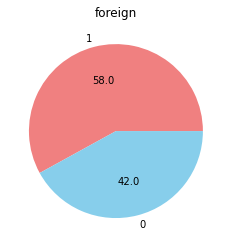

In [327]:
book_df['foreignn'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'],autopct='%1.1f')
plt.title( 'foreign' )  # 圖標題
plt.ylabel( '' )
plt.show()

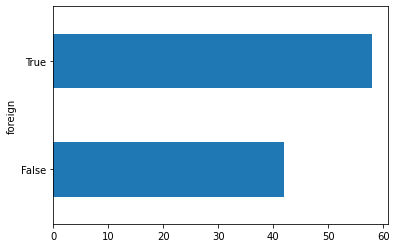

In [328]:
book_df.groupby('foreign')['foreignn'].count().plot(kind='barh')